# Basic Usage of the `tyssue` library





## Easy creation of a 2D epithelial sheet

In tyssue, an apical junction network is represented as a mesh. The structure of this mesh is stored in three tables (`pandas.DataFrame` objects) corresponding to vertices, faces and edges. The structure and data associated with these meshes are detailed bellow.


In [6]:
%matplotlib inline

# Core object
from tyssue import Sheet
# Simple 2D geometry
from tyssue import PlanarGeometry as geom
# Visualisation
from tyssue.draw import sheet_view

sheet = Sheet.planar_sheet_2d(
    'basic2D', # a name or identifier for this sheet
    nx=6, # approximate number of cells on the x axis
    ny=7, # approximate number of cells along the y axis
    distx=1, # distance between 2 cells along x
    disty=1 # distance between 2 cells along y
)
geom.update_all(sheet)


The `sheet_view` function displays the created object in a matplotlib figure:

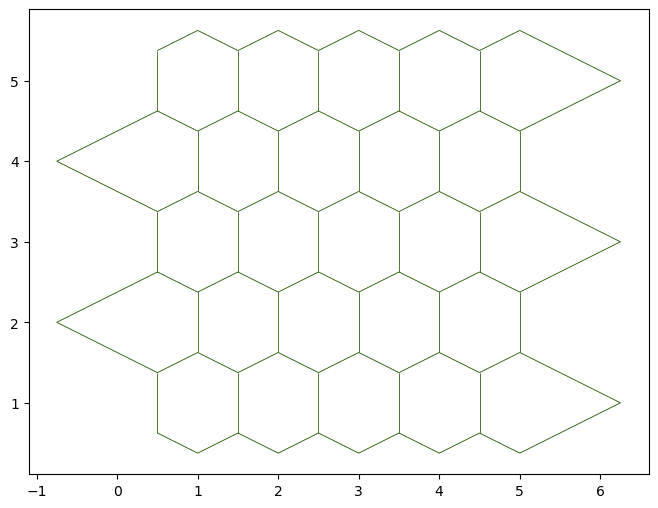

In [7]:
fig, ax = sheet_view(sheet)
fig.set_size_inches(8, 8)

We can have a cleaner, better ordered `sheet` with the `sanitize` method:


In [8]:
# Give the tissue a nice hear cut ;)
sheet.sanitize(trim_borders=True, order_edges=True)
geom.update_all(sheet)

c:\Users\Thomas\anaconda3\envs\cellbio\lib\site-packages\tyssue\topology\base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
c:\Users\Thomas\anaconda3\envs\cellbio\lib\site-packages\tyssue\topology\base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
c:\Users\Thomas\anaconda3\envs\cellbio\lib\site-packages\tyssue\topology\base_topology.py:168: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eptm.edge_df = eptm.edge_df.append(face_edges.iloc[0:1], ignore_index=True)
c:\Users\Thomas\anaconda3\envs\cellbio\lib\site-packages\tyssue\topology\base_topo

Here we pass an option to display the edge directions
see the visualization tutorial for details

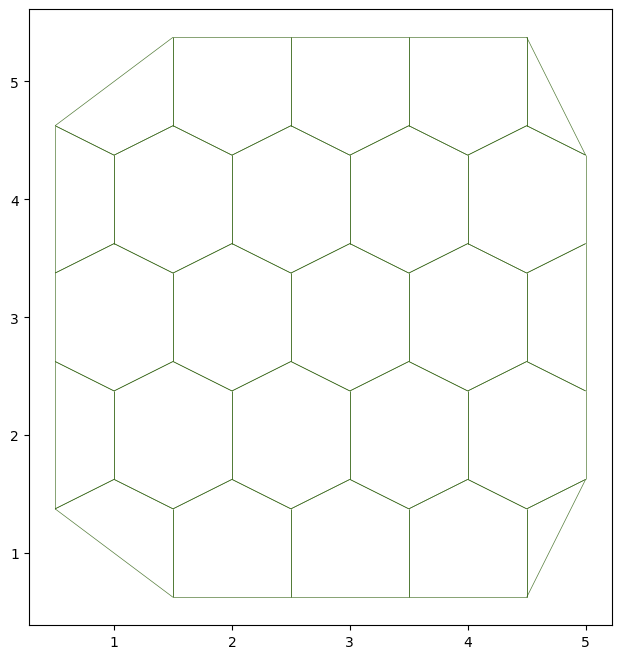

In [9]:
fig, ax = sheet_view(
    sheet, 
    mode="2D",
    edge={"head_width": 0.0}
)
fig.set_size_inches(8, 8)

> You can look at the `tyssue.generation` module for more sheet creation utilities.

### A remark on the half-edge data structure


As is represented in the above graph, each edge between two cells is composed of two half-edges (only one half-edge is present in the border ones). This makes it easier to compute many cell-specific quantities, as well as keeping a well oriented mesh. This is inspired by CGAL [polyhedral surfaces](https://doc.cgal.org/4.2/CGAL.CGAL.3D-Polyhedral-Surface/html/index.html).

## Datasets


The data associated with the mesh displayed above, i.e. the points positions,
the connectivity information, etc. is stored in pandas [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) objects, hold together in the `datasets` dictionnary.


Depending on the geometry, the following dataframes are populated:
* `datasets["edge"]` or `sheet.edge_df`: The edge related dataframe contains  the connectivity information:
   source and target vertices, associated face and (for thick tissues)
   the associated cell body, geometry data associated with the edge, such as its length
   and any suplemental data, such as a color or a dynamical parameter (an elasticity for example)

* `datasets["vert"]` or `sheet.vert_df`: The vertices related dataframe. In the apical junction mesh above, 
  those are  the vertices at the cells junctions. It usually holds the coordinates of the points, 
  and geometry or dynamical data.

* `datasets["face"]` or `sheet.face_df`: The faces related dataframe. For a thin, 2D tissue, this corresponds to
  a cell of the epithelium, delimited by its edges. In thick, 3D models, one cell has several faces
  (the apical, sagittal and basal ones for a 3D monolayer, for example).
 
* `datasets["cell"]` or `sheet.cell_df`: The cells related dataframe, only for 3D, thick, epithelium.
  Each cell have several faces.
  
  
  ![datastructures in `tyssue`](illus/tyssue_data_management.png)
 

In [10]:
for element, data in sheet.datasets.items():
    print(f"{element} table has shape {data.shape}")

vert table has shape (48, 3)
edge table has shape (128, 20)
face table has shape (25, 7)


In [11]:
sheet.datasets['edge'].head()

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,ty,fx,fy,ux,uy,rx,ry,sub_area,is_valid,phi
edge,,,,,,,,,,,,,,,,,,,,
0,30,0.28125,0.750000,0,28,0.0,0.75,1.5,0.625,1.5,1.375,1.125,1.250,0.000000,1.000000,0.375,-0.625,0.140625,True,-0.643501
1,9,0.15625,0.559017,0,30,-0.5,0.25,1.5,1.375,1.0,1.625,1.125,1.250,-0.894427,0.447214,0.375,0.125,0.078125,True,0.643501
2,5,0.21875,0.559017,0,9,-0.5,-0.25,1.0,1.625,0.5,1.375,1.125,1.250,-0.894427,-0.447214,-0.125,0.375,0.109375,True,1.570796
3,28,0.34375,1.250000,0,5,1.0,-0.75,0.5,1.375,1.5,0.625,1.125,1.250,1.788854,-1.341641,-0.625,0.125,0.171875,True,1.570796
4,43,0.37500,0.750000,1,29,0.0,0.75,2.5,0.625,2.5,1.375,2.000,1.125,0.000000,1.000000,0.500,-0.500,0.187500,True,-0.643501


The `edge_df` dataframe contains most of the information. In particular, each time the geometry is updated with the `geom.update_all(sheet)` function, the positions of the source and target vertices of each edge are copied to the `"sx", "sy"` and `"tx", "ty"` columns, respectively.



In [12]:
sheet.face_df.head()

,y,is_alive,perimeter,area,x,num_sides,id
face,,,,,,,
0,1.250000,1,3.118034,0.5000,1.125000,4,0
1,1.125000,1,3.618034,0.8750,2.000000,5,0
2,1.125000,1,3.618034,0.8750,3.000000,5,0
3,1.125000,1,3.618034,0.8750,4.000000,5,0
4,1.208333,1,2.427051,0.1875,4.666667,3,0


We can use all the goodies from pandas DataFrames objects. For example, it is possible to 
compute the average edge length for each face like so:

In [13]:
sheet.edge_df.groupby('face')['length'].mean().head()

face
0    0.779508
1    0.723607
2    0.723607
3    0.723607
4    0.809017
Name: length, dtype: float64

## Specifications



**Specifications** are defined as a nested dictionnary, `sheet.specs`. For each element `("vert", "edge", face", "cell")`, the specification defines the columns of the corresponding DataFrame and their default values. An extra key at the root of the specification is called `"settings"`, and can hold specific parameters, for example the arguments for an energy minimization procedure. For exemple, consider the following `spec` dictionnary

```python
spec = {
    "vert": {
        "x": 0.0,
        "y": 0.0,
        "active": True
    },
    "edge": {
        "tension": 0.0,
        "length": 1,
    },
    "face": {
        "area": 0.0,
        "alive": True,
    },
}
```

This defines e.g an  `"area"` column for `sheet.face_df`. 

By calling `sheet.update_specs(specs)` method, those columns will be added to the respective dataframes.



In [14]:
sheet.update_specs({"edge": {"tension": 0.0}})
sheet.edge_df['tension'].head()

edge
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tension, dtype: float64

Optionaly, you can pass `reset=True` to `update_spec` (a warning is emitted):

In [15]:
sheet.update_specs(
    {"edge": {"tension": 1.0}},
    reset=True
)
sheet.edge_df['tension'].head()

Reseting column tension of the edge dataset with new specs


edge
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: tension, dtype: float64

## Input and Output

The 'native' format is to save the datasets to hdf5 via [`pandas.HDFStore`](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#hdfstore). The `io.obj` also provides functions to export the junction mesh or triangulations to the wavefront `OBJ` format (requires `vispy`), for easy import in 3D software such as Blender.

Here is the code to save the data in wavefront `OBJ`:
```python
obj.save_junction_mesh('junctions.obj', sheet)
```

The standard data format for the datasets is HDF:

In [16]:
from tyssue.io import hdf5

#### Writing

In [17]:
hdf5.save_datasets('tmp_data.hdf5', sheet)


#### Reading

In [18]:
dsets = hdf5.load_datasets('tmp_data.hdf5')
sheet2 = Sheet('reloaded', dsets)

In [19]:
!rm tmp_data.hdf5

'rm' is not recognized as an internal or external command,
operable program or batch file.


Specs can be saved as json files:

In [20]:
import json

with open("tmp_specs.json", "w") as jh:
    json.dump(sheet.specs, jh)

And reloaded accordingly

In [21]:
with open("tmp_specs.json", "r") as jh:
    specs = json.load(jh)

sheet2.update_specs(specs, reset=False)

In [22]:
!rm tmp_specs.json

'rm' is not recognized as an internal or external command,
operable program or batch file.


> This should evolve in the future to have a "single shop stop" for all the data, surely as a [zarr](https://zarr.readthedocs.io/en/latest/) data store. 
> Also we plan on using [meshio](https://github.com/nschloe/meshio) as an I/O interface.

## Upcasting and downcasting data

It is often necessary to use a vertex-associated data on a computation involving faces, are other combinations of elements. Tyssue offers the upcast and downcast mechanisms to do that.

> This part is less important for an immediate use of tyssue, you can skip it at first.

### Upcasting

Geometry or physics computations often require to access for example
the cell related data on each of the cell's edges. The `Epithelium`
class and its derivatives defines utilities to make this,
i.e copying the area of each face to each of its edges:

In [23]:
print('Faces associated with the first edges:')
print(sheet.edge_df['face'].head())
print('\n')

# First edge associated face
face = sheet.edge_df.loc[0, 'face']

print('Area of cell # {}:'.format(int(face)))
print(sheet.face_df.loc[face, 'area'])

print('\n')
print('Upcasted areas over the edges:')
print(sheet.upcast_face(sheet.face_df['area']).head())

Faces associated with the first edges:
edge
0    0
1    0
2    0
3    0
4    1
Name: face, dtype: int32


Area of cell # 0:
0.5


Upcasted areas over the edges:
edge
0    0.500
1    0.500
2    0.500
3    0.500
4    0.875
Name: area, dtype: float64


The values have indeed been upcasted. This can also be done with the source and target vertices 
(`sheet.upcast_srce`, `sheet.upcast_trgt`) and cells in the 3D case (`sheet.upcast_cell`).

### Downcasting

This is usually done by `groupby` operations as shown above.
Syntactic sugar is available for summation, e.g. over every edges with a given source: 

In [24]:
sheet.sum_srce(sheet.edge_df['length']).head()

,length
srce,
0,1.868034
1,1.309017
2,1.809017
3,1.868034
4,1.868034
